# Loading in and plotting met station data (Mesa West) from Google Drive

In [104]:
%%capture
!pip install git+https://github.com/friedrichknuth/driveanon.git
    
import driveanon

In [44]:
blob_id = '1YT9bNveID55Lo5j4upMGrA7vEl5FWXp_' #blob_id of the mesa west met file, .csv version
#for blob_id in file_blob_ids:
f = driveanon.save(blob_id)
f

FileExistsError: File exists: MW-V7_clean.csv

## The file should now be in your working directory

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#load in csv file
f = 'MW-V7_clean.csv'
df = pd.read_csv('./'+f)

#converts any NAN text to NaN and numeric columns (fixes error raised)
for (columnName, columnData) in df.iteritems():
    df[columnName] = pd.to_numeric(df[columnName],errors='coerce')
    
df.head(10)

/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,DOY,Month,Day,Hour,Minute,Decimal_Year,Flag,AirTC_10ft_Avg_C,RH_10ft_%,...,TCstringC_250cm_Avg,TCstringC_275cm_Avg,TCstringC_300cm_Avg,SM_5cm_Avg,TC_5cm_Avg_C,SM_20cm_Avg_vv,TC_20cm_Avg_C,SM_50cm_Avg_vv,TC_50cm_Avg_C,SnowDepth_m
0,2016,283,10,9,21,10,2016.772892,0,NaN,NaN,...,8.80,8.840,9.10,0.1400,7.746,0.247,5.543,0.311,6.930,NaN
1,2016,283,10,9,21,20,2016.772911,0,NaN,NaN,...,8.81,8.960,9.24,0.1400,8.030,0.247,5.652,0.309,7.061,NaN
2,2016,283,10,9,21,30,2016.772930,0,NaN,NaN,...,8.80,8.950,9.41,0.1390,8.190,0.245,5.739,0.306,7.120,NaN
3,2016,283,10,9,21,40,2016.772949,0,NaN,NaN,...,8.32,8.470,8.86,0.1370,8.320,0.244,5.800,0.305,7.198,NaN
4,2016,283,10,9,21,50,2016.772968,0,NaN,57.15,...,8.66,8.850,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,283,10,9,22,0,2016.772987,0,8.70,55.11,...,9.17,9.410,10.05,0.1370,8.490,0.244,5.900,0.306,7.200,0.050106
6,2016,283,10,9,22,10,2016.773006,1,9.22,55.41,...,10.10,10.345,11.07,0.1385,8.580,0.244,5.950,0.306,7.204,0.029106
7,2016,283,10,9,22,20,2016.773025,0,9.74,55.71,...,11.03,11.280,12.09,0.1400,8.670,0.244,6.000,0.306,7.208,0.008106
8,2016,283,10,9,22,30,2016.773044,0,9.26,56.55,...,10.28,10.530,11.15,0.1400,8.810,0.244,6.000,0.305,7.217,0.009106
9,2016,283,10,9,22,40,2016.773063,0,8.69,57.76,...,8.72,8.760,9.48,0.1410,8.900,0.244,6.073,0.305,7.224,0.009106


In [2]:
df.shape

(196812, 57)

In [3]:
#create and add datetime column
full_dates = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=df['Day'], hour = df['Hour'], minute = df['Minute']))
df.insert(7, 'Datetime_UTC', full_dates)

df.head()

,Year,DOY,Month,Day,Hour,Minute,Decimal_Year,Datetime_UTC,Flag,AirTC_10ft_Avg_C,...,TCstringC_250cm_Avg,TCstringC_275cm_Avg,TCstringC_300cm_Avg,SM_5cm_Avg,TC_5cm_Avg_C,SM_20cm_Avg_vv,TC_20cm_Avg_C,SM_50cm_Avg_vv,TC_50cm_Avg_C,SnowDepth_m
0,2016,283,10,9,21,10,2016.772892,2016-10-09 21:10:00,0,NaN,...,8.80,8.84,9.10,0.140,7.746,0.247,5.543,0.311,6.930,NaN
1,2016,283,10,9,21,20,2016.772911,2016-10-09 21:20:00,0,NaN,...,8.81,8.96,9.24,0.140,8.030,0.247,5.652,0.309,7.061,NaN
2,2016,283,10,9,21,30,2016.772930,2016-10-09 21:30:00,0,NaN,...,8.80,8.95,9.41,0.139,8.190,0.245,5.739,0.306,7.120,NaN
3,2016,283,10,9,21,40,2016.772949,2016-10-09 21:40:00,0,NaN,...,8.32,8.47,8.86,0.137,8.320,0.244,5.800,0.305,7.198,NaN
4,2016,283,10,9,21,50,2016.772968,2016-10-09 21:50:00,0,NaN,...,8.66,8.85,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#check data types to verify
df.dtypes

Year                              int64
DOY                               int64
Month                             int64
Day                               int64
Hour                              int64
Minute                            int64
Decimal_Year                    float64
Datetime_UTC             datetime64[ns]
Flag                              int64
AirTC_10ft_Avg_C                float64
RH_10ft_%                       float64
AirTC_20ft_Avg_C                float64
RH_20ft_%                       float64
WSms_10ft_Avg                   float64
WindDir_10ft_deg                float64
WSms_20ft_Avg                   float64
WindDir_20ft_deg                float64
SUp_Avg_Wm2                     float64
SDn_Avg_Wm2                     float64
LUpCo_Avg_Wm2                   float64
LDnCo_Avg_Wm2                   float64
TCDT_Avg_C                      float64
IRtarget_nadir1_C_Avg           float64
IRtarget_nadir2_C_Avg           float64
IRtarget_30degN_C_Avg           float64


In [5]:
#latitude and longitude of site
MW_lat = 39.03388
MW_lon = -108.21399

In [6]:
#functions to parse site IDs to vegetation classes etc. (from Dillon and Steven)
def parse_veg_class(site_id):
    '''
    This function parses snow pit data into three vegetation classes:
        - 1). Treeless, 2). Sparce, and 3). Dense
    It uses a python dictionary where:
        (k) keys: are the vegetation classes
        (v) values: are the first digit in the pitID assignment
    '''
    # Classifying by vegetation coverage 
    veg_class = {'treeless':[1, 2, 3], 'sparse':[4, 5, 6], 'dense':[7, 8, 9]}
    vclass = None 
    class_id = site_id[0]
    if class_id.isnumeric():
        class_id = int(class_id)
        for k,v in veg_class.items():
            if class_id in v: #if the first digit in the site_id is 'v' assign it to the corresponding 'k'
                vclass = k 
    return vclass 

def parse_depth_class(site_id):
    '''
    This function parses snow pit data into three depth classes:
        - 1). Shallow, 2). Medium, and 3). Deep
    It uses a python dictionary where:
        (k) keys: are the depth classes
        (v) values: are the first digit in the pitID assignment
    '''
    # Classifying by 2017 depth 
    depth_class = {'shallow':[1, 4, 7], 'medium':[2, 5, 8], 'deep':[3, 6, 9]} 
    dclass = None 
    class_id = site_id[0]
    if class_id.isnumeric(): #for the outlier TS site
        class_id = int(class_id) #cast as integer
        for k,v in depth_class.items(): #for the key, value pairs in the dict listed above:
            if class_id in v: #if the first digit in the site_id is 'v' assign it to the corresponding 'k'
                dclass = k 
    return dclass

In [7]:
parse_veg_class('8S18')

'dense'

In [8]:
parse_depth_class('8S18')

'medium'

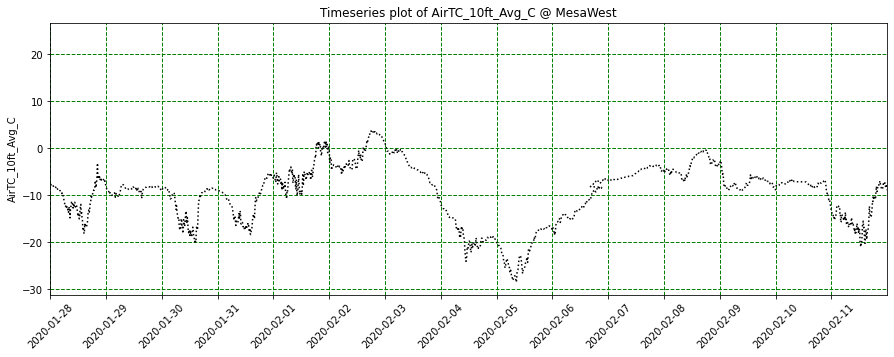

In [10]:
#plotting air temperature at 10ft above ground
variable = 'AirTC_10ft_Avg_C'
IOP = 1 #if IOP = 1, will focus in on IOP period
# plot the index for the x-values
plt.figure(figsize=(15,5))
plt.plot(df['Datetime_UTC'], df[variable], color='k',linestyle = ':') 
plt.grid(color='g', linestyle='--', linewidth=1)
#plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel(variable) 
plt.title('Timeseries plot of ' + variable + ' @ MesaWest')
if IOP == 1:
    d1 = datetime.datetime(year=2020,month=1,day=28)
    d2 = datetime.datetime(year=2020,month=2,day=12)
    delta = d2 - d1
    plt.xlim(d1,d2)
    date_list = [d1 + datetime.timedelta(days=x) for x in range(delta.days)]
    datestr_list = [date_i.strftime('%Y-%m-%d') for date_i in date_list]
    plt.xticks(ticks=date_list, labels=datestr_list)
plt.show()

## Try to plot snow surface temperatures on the above plot

In [11]:
#read in PitSurfaceTemperatures.csv (see QueryPractice to show how to save these as a .csv)
f = 'PitSurfaceTemps.csv'
pitMax_df = pd.read_csv('./'+f)
pitMax_df.head()

,site_name,site_id,date,time,depth_cm,temperature_C,latitude,longitude,northing,easting,utm_zone,geom
0,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,101.0,-13.1,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072 4322442)
1,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,77.0,-20.0,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076 4322689)
2,Grand Mesa,8C36,2020-02-05,09:22:00-06:00,76.0,-20.6,39.008706,-108.154670,4321595.0,746373.0,12,POINT (746373 4321595)
3,Grand Mesa,1S13,2020-02-05,13:15:00-06:00,83.0,-16.7,39.017789,-108.190059,4322508.0,743277.0,12,POINT (743277 4322508)
4,Grand Mesa,8C35,2020-02-05,10:20:00-06:00,85.0,-11.1,39.010813,-108.157218,4321822.0,746145.0,12,POINT (746145 4321822)


In [12]:
#pitMax_df.dtypes
#add datetime column
pit_datestr = pitMax_df['date'] + ' ' + pitMax_df['time']
pit_dates =  pd.to_datetime(pitMax_df['date'] + ' ' + pitMax_df['time'])#, format='%d%b%Y:%H:%M:%S.%f')
pitMax_df.insert(4, 'Datetime_UTC', pit_dates.dt.tz_localize(None)+datetime.timedelta(hours=6))
#remove timezone from datetime

#pitMax_df['Datetime_UTC'] = pitMax_df['Datetime_UTC'].replace(tzinfo=None)
pitMax_df.head()

,site_name,site_id,date,time,Datetime_UTC,depth_cm,temperature_C,latitude,longitude,northing,easting,utm_zone,geom
0,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,2020-02-05 19:40:00,101.0,-13.1,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072 4322442)
1,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,2020-02-05 15:45:00,77.0,-20.0,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076 4322689)
2,Grand Mesa,8C36,2020-02-05,09:22:00-06:00,2020-02-05 15:22:00,76.0,-20.6,39.008706,-108.154670,4321595.0,746373.0,12,POINT (746373 4321595)
3,Grand Mesa,1S13,2020-02-05,13:15:00-06:00,2020-02-05 19:15:00,83.0,-16.7,39.017789,-108.190059,4322508.0,743277.0,12,POINT (743277 4322508)
4,Grand Mesa,8C35,2020-02-05,10:20:00-06:00,2020-02-05 16:20:00,85.0,-11.1,39.010813,-108.157218,4321822.0,746145.0,12,POINT (746145 4321822)


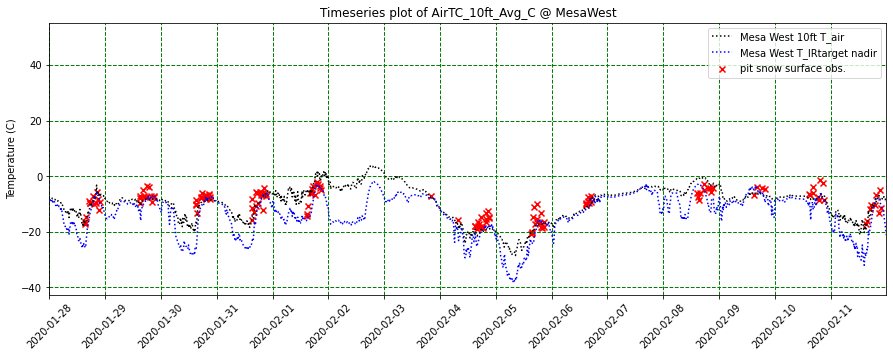

In [13]:
# SAME PLOT AS ABOVE BUT PIT TEMPERATURES ARE ADDED

#plotting air temperature at 10ft above ground
variable = 'AirTC_10ft_Avg_C'
IOP = 1 #if IOP = 1, will focus in on IOP period
# plot the index for the x-values
plt.figure(figsize=(15,5))
plt.plot(df['Datetime_UTC'], df[variable], color='k',linestyle = ':',label='Mesa West 10ft T_air')
plt.plot(df['Datetime_UTC'], df['IRtarget_nadir1_C_Avg'], color='b',linestyle = ':',label='Mesa West T_IRtarget nadir')
plt.grid(color='g', linestyle='--', linewidth=1)
#plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Temperature (C)') 
plt.title('Timeseries plot of ' + variable + ' @ MesaWest')

#new code to add in the site temperatures
plt.scatter(pitMax_df['Datetime_UTC'],pitMax_df['temperature_C'],c='r',marker='x',label='pit snow surface obs.')
plt.xticks(rotation=45)

if IOP == 1:
    d1 = datetime.datetime(year=2020,month=1,day=28)
    d2 = datetime.datetime(year=2020,month=2,day=12)
    delta = d2 - d1
    plt.xlim(d1,d2)
    date_list = [d1 + datetime.timedelta(days=x) for x in range(delta.days)]
    datestr_list = [date_i.strftime('%Y-%m-%d') for date_i in date_list]
    plt.xticks(ticks=date_list, labels=datestr_list)
plt.legend()
plt.show()

In [31]:
#generate summary statistics (average difference between pit obs temperature and tower air, T_ir)
#loop through all surface temperature rows

#to store the summary statistics comparing temperatures (stores site temperatures nearest in time with pit data)
df_pitCompare = pd.DataFrame(columns=['pit_ID','pit_Datetime_UTC','pit_temp_C','air_temp_C','air_dif_C','ir_temp_C','ir_dif_C'])
r = 0
for index, row in pitMax_df.iterrows():
    
    DT_dif = abs(df['Datetime_UTC'] - row['Datetime_UTC'])
    #pit temperature
    pit_tempi = row['temperature_C']
    
    #find minimum, extract temperature
    air_tempi = df['AirTC_10ft_Avg_C'][DT_dif.idxmin()]
    ir_tempi = df['IRtarget_nadir1_C_Avg'][DT_dif.idxmin()]
    
    #add row to output
    data = {'pit_ID': row['site_id'],'pit_Datetime_UTC': row['Datetime_UTC'],
            'pit_temp_C': pit_tempi,'air_temp_C': air_tempi,'air_dif_C': air_tempi - pit_tempi,
            'ir_temp_C': ir_tempi,'ir_dif_C': ir_tempi - pit_tempi}
    df_pitCompare.loc[r] = data
    r += 1
    
    #print('pit: ' + str(pit_tempi) + ' C')
    #print('air: ' + str(air_tempi) + ' C')
    #print('ir: ' + str(ir_tempi) + ' C')
    #print(row['Datetime_UTC'])
    
df_pitCompare

,pit_ID,pit_Datetime_UTC,pit_temp_C,air_temp_C,air_dif_C,ir_temp_C,ir_dif_C
0,8S18,2020-02-05 19:40:00,-13.1,-17.120,-4.020,-16.150,-3.050
1,2S10,2020-02-05 15:45:00,-20.0,-19.950,0.050,-24.150,-4.150
2,8C36,2020-02-05 15:22:00,-20.6,-20.180,0.420,-24.130,-3.530
3,1S13,2020-02-05 19:15:00,-16.7,-17.250,-0.550,-16.200,0.500
4,8C35,2020-02-05 16:20:00,-11.1,-19.390,-8.290,-23.670,-12.570
...,...,...,...,...,...,...,...
150,8C31,2020-02-09 18:30:00,-4.4,-6.440,-2.040,-6.084,-1.684
151,8C32,2020-02-09 19:50:00,-4.7,-7.090,-2.390,-9.460,-4.760
152,9C23,2020-02-09 15:00:00,-6.8,-6.336,0.464,-4.862,1.938
153,5C27,2020-02-09 16:35:00,-4.0,-6.113,-2.113,-4.751,-0.751


In [32]:
degree_sign = u"\N{DEGREE SIGN}" #store degree symbol

#return the mean difference of each observation to the pit data
air_dif_mean = df_pitCompare['air_dif_C'].mean()
ir_dif_mean = df_pitCompare['ir_dif_C'].mean()
print('Mean difference (Tair - pit Tsurface): ' + f'{air_dif_mean:.2f}' + ' ' + degree_sign + 'C')
print('Mean difference (T_ir - pit Tsurface): ' + f'{ir_dif_mean:.2f}' + ' ' + degree_sign + 'C')

Mean difference (Tair - pit Tsurface): -0.95 °C
Mean difference (T_ir - pit Tsurface): -3.19 °C


# Next step, split by vegetation cover and snow depth (how much closer in temperature will the pit and IR be in the open areas?)
## Uses the functions defined by Steven and Dillon

In [33]:
#identify site type information and append to dataframe, sites with no numeric class will be NaN
pit_classN = pd.to_numeric(df_pitCompare['pit_ID'].astype(str).str[0],errors='coerce')
df_pitCompare.insert(1, 'pit_class', pit_classN)
df_pitCompare.insert(2, 'veg_class', df_pitCompare['pit_ID'].apply(parse_veg_class))
df_pitCompare.insert(3, 'depth_class', df_pitCompare['pit_ID'].apply(parse_depth_class))
df_pitCompare.head()

,pit_ID,pit_class,veg_class,depth_class,pit_Datetime_UTC,pit_temp_C,air_temp_C,air_dif_C,ir_temp_C,ir_dif_C
0,8S18,8.0,dense,medium,2020-02-05 19:40:00,-13.1,-17.12,-4.02,-16.15,-3.05
1,2S10,2.0,treeless,medium,2020-02-05 15:45:00,-20.0,-19.95,0.05,-24.15,-4.15
2,8C36,8.0,dense,medium,2020-02-05 15:22:00,-20.6,-20.18,0.42,-24.13,-3.53
3,1S13,1.0,treeless,shallow,2020-02-05 19:15:00,-16.7,-17.25,-0.55,-16.20,0.50
4,8C35,8.0,dense,medium,2020-02-05 16:20:00,-11.1,-19.39,-8.29,-23.67,-12.57


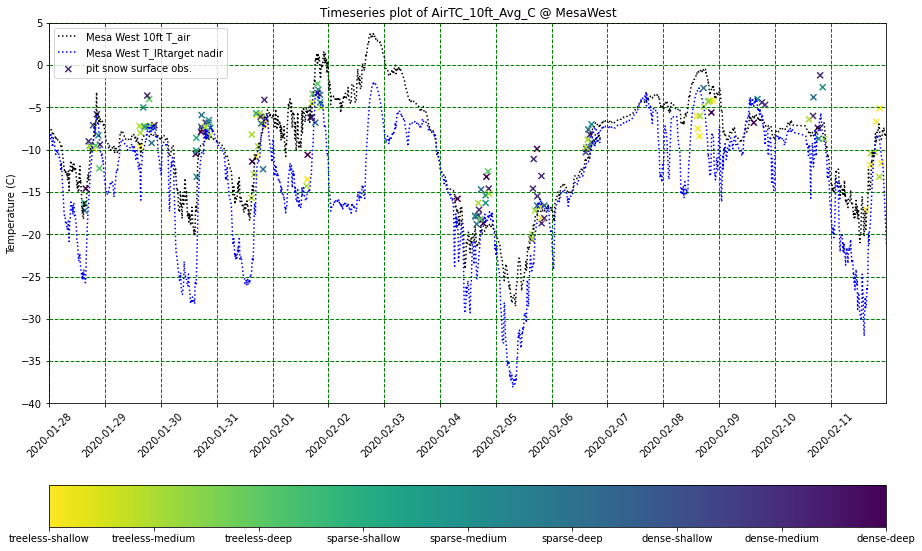

In [81]:
# SAME PLOT AS ABOVE BUT Sites are classified based on vegetation cover

#plotting air temperature at 10ft above ground
variable = 'AirTC_10ft_Avg_C'
IOP = 1 #if IOP = 1, will focus in on IOP period
# plot the index for the x-values
plt.figure(figsize=(15,10))
plt.plot(df['Datetime_UTC'], df[variable], color='k',linestyle = ':',label='Mesa West 10ft T_air')
plt.plot(df['Datetime_UTC'], df['IRtarget_nadir1_C_Avg'], color='b',linestyle = ':',label='Mesa West T_IRtarget nadir')
plt.grid(color='g', linestyle='--', linewidth=1)
#plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Temperature (C)') 
plt.title('Timeseries plot of ' + variable + ' @ MesaWest')

#new code to add in the site temperatures
plt.scatter(df_pitCompare['pit_Datetime_UTC'],df_pitCompare['pit_temp_C'],c=df_pitCompare['pit_class'],marker='x',label='pit snow surface obs.',cmap='viridis_r')
plt.xticks(rotation=45)
cbar = plt.colorbar(ticks=list(range(1,10)), orientation='horizontal')
cbar.ax.set_xticklabels(['treeless-shallow', 'treeless-medium', 'treeless-deep',
                         'sparse-shallow', 'sparse-medium', 'sparse-deep',
                         'dense-shallow', 'dense-medium', 'dense-deep'])  # horizontal colorbar

if IOP == 1:
    d1 = datetime.datetime(year=2020,month=1,day=28)
    d2 = datetime.datetime(year=2020,month=2,day=12)
    delta = d2 - d1
    plt.xlim(d1,d2)
    plt.ylim(-40,5)
    date_list = [d1 + datetime.timedelta(days=x) for x in range(delta.days)]
    datestr_list = [date_i.strftime('%Y-%m-%d') for date_i in date_list]
    plt.xticks(ticks=date_list, labels=datestr_list)
    plt.xticks(rotation=45)
plt.legend()
plt.show()

In [82]:
#add pit_classifier with descriptive names
map_dict = {1: "treeless-shallow",2: "treeless-medium",3: "treeless-deep",
            4: "sparse-shallow",5: "sparse-medium",6: "sparse-deep",
            7: "dense-shallow",8: "dense-medium",9: "dense-deep"}
df_pitCompare["pit_class_names"] = df_pitCompare["pit_class"].map(map_dict)
df_pitCompare

,pit_ID,pit_class,veg_class,depth_class,pit_Datetime_UTC,pit_temp_C,air_temp_C,air_dif_C,ir_temp_C,ir_dif_C,pit_class_names
0,8S18,8.0,dense,medium,2020-02-05 19:40:00,-13.1,-17.120,-4.020,-16.150,-3.050,dense-medium
1,2S10,2.0,treeless,medium,2020-02-05 15:45:00,-20.0,-19.950,0.050,-24.150,-4.150,treeless-medium
2,8C36,8.0,dense,medium,2020-02-05 15:22:00,-20.6,-20.180,0.420,-24.130,-3.530,dense-medium
3,1S13,1.0,treeless,shallow,2020-02-05 19:15:00,-16.7,-17.250,-0.550,-16.200,0.500,treeless-shallow
4,8C35,8.0,dense,medium,2020-02-05 16:20:00,-11.1,-19.390,-8.290,-23.670,-12.570,dense-medium
...,...,...,...,...,...,...,...,...,...,...,...
150,8C31,8.0,dense,medium,2020-02-09 18:30:00,-4.4,-6.440,-2.040,-6.084,-1.684,dense-medium
151,8C32,8.0,dense,medium,2020-02-09 19:50:00,-4.7,-7.090,-2.390,-9.460,-4.760,dense-medium
152,9C23,9.0,dense,deep,2020-02-09 15:00:00,-6.8,-6.336,0.464,-4.862,1.938,dense-deep
153,5C27,5.0,sparse,medium,2020-02-09 16:35:00,-4.0,-6.113,-2.113,-4.751,-0.751,sparse-medium


In [87]:
#compute averages based on each class
OUT = df_pitCompare.groupby(by=["pit_class_names"]).mean()
#compute averages based on each class
N = df_pitCompare.groupby(df_pitCompare["pit_class_names"]).nunique()
OUT.insert(6, 'N', N["pit_ID"])
OUT

,pit_class,pit_temp_C,air_temp_C,air_dif_C,ir_temp_C,ir_dif_C,N
pit_class_names,,,,,,,
dense-deep,9.0,-9.794118,-11.442278,-1.199471,-14.861111,-4.721176,18
dense-medium,8.0,-10.281481,-12.361481,-2.080000,-13.551963,-3.270481,27
dense-shallow,7.0,-10.460000,-12.134000,-1.674000,-13.008000,-2.548000,5
sparse-deep,6.0,-9.694444,-10.225944,-0.531500,-11.875333,-2.180889,18
sparse-medium,5.0,-8.036842,-10.196000,-2.159158,-11.537474,-3.500632,18
sparse-shallow,4.0,-10.200000,-14.546667,-4.346667,-21.580000,-11.380000,3
treeless-deep,3.0,-8.184444,-8.362556,-0.178111,-10.412333,-2.227889,9
treeless-medium,2.0,-10.036970,-10.353455,-0.316485,-13.269909,-3.232939,33
treeless-shallow,1.0,-9.763158,-8.711947,1.051211,-11.110684,-1.347526,18


In [88]:
#visualize the results

#create trimmed dataset
cols = ['pit_temp_C','air_temp_C','ir_temp_C','N']
OUT_c = OUT[cols]
OUT_c

,pit_temp_C,air_temp_C,ir_temp_C,N
pit_class_names,,,,
dense-deep,-9.794118,-11.442278,-14.861111,18
dense-medium,-10.281481,-12.361481,-13.551963,27
dense-shallow,-10.460000,-12.134000,-13.008000,5
sparse-deep,-9.694444,-10.225944,-11.875333,18
sparse-medium,-8.036842,-10.196000,-11.537474,18
sparse-shallow,-10.200000,-14.546667,-21.580000,3
treeless-deep,-8.184444,-8.362556,-10.412333,9
treeless-medium,-10.036970,-10.353455,-13.269909,33
treeless-shallow,-9.763158,-8.711947,-11.110684,18


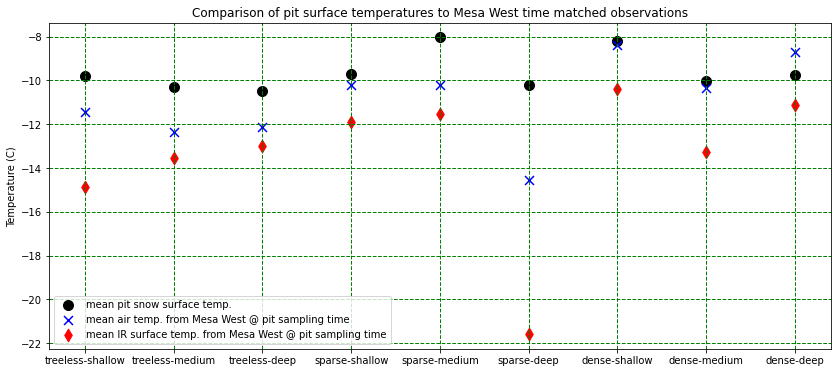

In [103]:
#
plt.figure(figsize=(14,6))
plt.grid(color='g', linestyle='--', linewidth=1)
plt.scatter(list(range(1,10)),OUT_c['pit_temp_C'],c='k',s=100,marker='o',label='mean pit snow surface temp.')
plt.scatter(list(range(1,10)),OUT_c['air_temp_C'],c='b',s=80,marker='x',label='mean air temp. from Mesa West @ pit sampling time')
plt.scatter(list(range(1,10)),OUT_c['ir_temp_C'],c='r',s=80,marker='d',label='mean IR surface temp. from Mesa West @ pit sampling time')


#plt.xlabel('Date')
#plt.xticks(rotation=45)
plt.xticks(ticks=list(range(1,10)), labels=['treeless-shallow', 'treeless-medium', 'treeless-deep',
                                            'sparse-shallow', 'sparse-medium', 'sparse-deep',
                                            'dense-shallow', 'dense-medium', 'dense-deep'])
plt.ylabel('Temperature (C)') 
plt.title('Comparison of pit surface temperatures to Mesa West time matched observations')
plt.legend()
plt.show()